In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pybedtools as pb
from matplotlib.colors import LogNorm
import numpy as np
from scipy import stats
import pybedtools as pb
font = {'family' : 'sans-serif',
        'weight' : 'light',
        'size'   : '12'}

plt.rc('font', **font)

In [2]:
expr = {}

with open("expr_diff.brain_vs_heart_wt.edgeR.txt", "r") as fo:
        for l in fo.read().splitlines():
            if l.split("\t")[0] != "gene_id":
                gene_name = l.split("\t")[1]
                fdr = float(l.split("\t")[-2])
                logF = float(l.split("\t")[2])
                if "," in gene_name:
                    for test in gene_name.split(","): 
                        if fdr < 0.05:
                            expr.setdefault(test.upper(),logF) 
                #print gene_name, fdr
                else:
                    if fdr < 0.05:
                        expr.setdefault(gene_name.upper(),logF)

expr_all = {}
with open("expr_diff.brain_vs_heart_wt.edgeR.txt", "r") as fo:
        for l in fo.read().splitlines():
            if l.split("\t")[0] != "gene_id":
                gene_name = l.split("\t")[1]
                fdr = float(l.split("\t")[-2])
                logF = float(l.split("\t")[2])
                if "," in gene_name:
                    for test in gene_name.split(","): 
                        expr_all.setdefault(test.upper(),logF) 
                #print gene_name, fdr
                else:
                    expr_all.setdefault(gene_name.upper(),logF)

In [3]:
expr_ko = {}

with open("expr_diff.brain_vs_heart_ko.edgeR.txt", "r") as fo:
        for l in fo.read().splitlines():
            if l.split("\t")[0] != "gene_id":
                gene_name = l.split("\t")[1]
                fdr = float(l.split("\t")[-2])
                logF = float(l.split("\t")[2])
                if "," in gene_name:
                    for test in gene_name.split(","): 
                        if fdr < 0.05:
                            expr_ko.setdefault(test.upper(),logF) 
                #print gene_name, fdr
                else:
                    if fdr < 0.05:
                        expr_ko.setdefault(gene_name.upper(),logF)

expr_all_ko = {}
with open("expr_diff.brain_vs_heart_ko.edgeR.txt", "r") as fo:
        for l in fo.read().splitlines():
            if l.split("\t")[0] != "gene_id":
                gene_name = l.split("\t")[1]
                fdr = float(l.split("\t")[-2])
                logF = float(l.split("\t")[2])
                if "," in gene_name:
                    for test in gene_name.split(","): 
                        expr_all_ko.setdefault(test.upper(),logF) 
                #print gene_name, fdr
                else:
                    expr_all_ko.setdefault(gene_name.upper(),logF)

In [4]:
def find_genes_DE_inbed(bed_file, expr):
    for b in bed_file:
        if b.name.upper() in expr:
            yield b.name
            
def find_DE_inbed(bed_file, expr):
    for b in bed_file:
        if b.name.upper() in expr:
            yield expr[b.name.upper()]

In [5]:
### Number of DE genes for which we have enhancer annotation Brain/Heart

In [6]:
genes_enhancer_brain = np.genfromtxt("genes_in_enhancer_brain.txt", dtype="str")
genes_enhancer_heart = np.genfromtxt("genes_in_enhancer_heart.txt", dtype="str")

In [7]:
de_enhancer_brain = set()
for g in genes_enhancer_brain:
    if g.upper() in expr:
        de_enhancer_brain.add(expr[g.upper()])
de_enhancer_heart = set()
for g in genes_enhancer_heart:
    if g.upper() in expr:
        de_enhancer_heart.add(expr[g.upper()])

# no matter the fdr 
        
all_enhancer_brain = set()
for g in genes_enhancer_brain:
    if g.upper() in expr_all:
        all_enhancer_brain.add(expr_all[g.upper()])
all_enhancer_heart = set()
for g in genes_enhancer_heart:
    if g.upper() in expr_all:
        all_enhancer_heart.add(expr_all[g.upper()])

In [8]:
u5fC_brain = pb.BedTool("5fC_unique_to_brain_WT.bed.gz")
u5fC_heart = pb.BedTool("5fC_unique_to_heart_WT.bed.gz")
nuc_cons_brain = pb.BedTool("ConsensusNucleosome_iNPS_Brain_WT_noMT.bed")
nuc_cons_heart = pb.BedTool("ConsensusNucleosome_iNPS_Heart_WT_noMT.bed")

In [9]:
overlap=0.8
u5fC_brain_nuc = u5fC_brain.intersect(nuc_cons_brain, F=overlap, r=False)
u5fC_heart_nuc = u5fC_heart.intersect(nuc_cons_heart, F=overlap, r=False)

In [10]:
print("Number of 5fC-nuc_cons Brain:", len(u5fC_brain_nuc))
print("Number of 5fC-nuc_cons Heart:", len(u5fC_heart_nuc))

Number of 5fC-nuc_cons Brain: 1898
Number of 5fC-nuc_cons Heart: 393


## Intersect enhancers with 5fC-nucleosome

In [11]:
enhancer_brain = pb.BedTool("mm9_enhancer_brain_slop_1500.bed")
enhancer_heart = pb.BedTool("mm9_enhancer_heart_slop_1500.bed")
# BRAIN
num_b_5fCNuc_de = []
enhancers_unique_brain = enhancer_brain.intersect(u5fC_brain_nuc)
print("Brain Ren Lab --", len(set(find_genes_DE_inbed(enhancers_unique_brain, expr))))
num_b_5fCNuc_de.append(len(set(find_genes_DE_inbed(enhancers_unique_brain, expr))))
logfc_b_5fCNuc_de = set(find_DE_inbed(enhancers_unique_brain, expr))

enhancers_not_unique_brain = enhancer_brain.intersect(u5fC_brain_nuc, v=True)
logfc_b_not_5fCNuc_de = set(find_DE_inbed(enhancers_not_unique_brain, expr))

# HEART
num_h_5fCNuc_de = []
enhancers_unique_heart = enhancer_heart.intersect(u5fC_heart_nuc)
print("Heart Ren Lab --", len(set(find_genes_DE_inbed(enhancers_unique_heart, expr))))
num_h_5fCNuc_de.append(len(set(find_genes_DE_inbed(enhancers_unique_heart, expr))))
logfc_h_5fCNuc_de = set(find_DE_inbed(enhancers_unique_heart, expr))

enhancers_not_unique_heart = enhancer_heart.intersect(u5fC_heart_nuc, v=True)
logfc_h_not_5fCNuc_de = set(find_DE_inbed(enhancers_not_unique_heart, expr))

Brain Ren Lab -- 154
Heart Ren Lab -- 14


In [12]:
h_wt = set(find_genes_DE_inbed(enhancers_unique_heart, expr))
b_wt = set(find_genes_DE_inbed(enhancers_unique_brain, expr))
union_h_b_wt = np.array(list(h_wt.union(b_wt)))
col_wt = np.zeros((len(union_h_b_wt), 3))
for ii, ff in enumerate(union_h_b_wt):
    if ff in h_wt:
        h1 = 1
    else:
        h1 = -1
    if ff in b_wt:
        b1 = 1
    else:
        b1 = -1
    col_wt[ii, 0] = expr[str(ff).upper()]
    col_wt[ii, 1] = b1
    col_wt[ii, 2] = h1
    



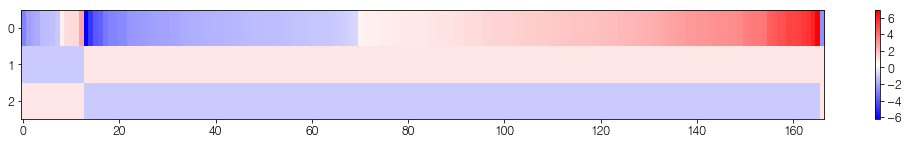

In [47]:
dd_wt = np.array(sorted(col_wt, key=lambda row: (row[1],row[2],row[0])))
fig, ax = plt.subplots(figsize=(18, 2))
_ = ax.imshow(dd_wt.T, cmap=plt.get_cmap("bwr"), aspect='auto')
fig.colorbar(_)

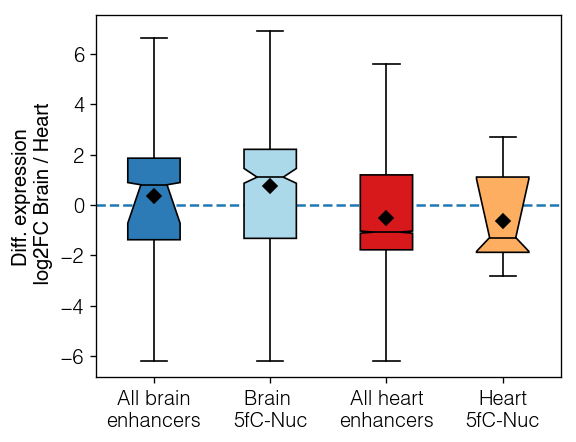

In [14]:
# Plot brain and heart
medianprops = dict(color='black')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='black')
f, ax = plt.subplots(1, 1, sharex=True,
                    figsize=(5,4), dpi=120)
_ = ax.axhline(linestyle="--")
_ = ax.boxplot([list(de_enhancer_brain), 
                    list(logfc_b_5fCNuc_de), 
                    list(de_enhancer_heart),
                    list(logfc_h_5fCNuc_de)], 
                   showmeans=True, notch=True, 
                medianprops=medianprops,
               meanprops=meanpointprops,
                patch_artist=True,
                showfliers=False, 
                bootstrap=5000)
colors = ['#2c7bb6', '#abd9e9',"#d7191c", "#fdae61"]
for patch, color in zip(_['boxes'], colors):
    patch.set_facecolor(color)
names = ["All brain\nenhancers", "Brain \n5fC-Nuc", "All heart\nenhancers", "Heart\n5fC-Nuc"]
ax.set_ylabel("Diff. expression\n log2FC Brain / Heart")
ax.set_xticklabels(names)
plt.savefig("boxplot_DE_tissues_WT_5fc.pdf", bbox_inches = 'tight')

In [15]:
_, pval = stats.mannwhitneyu(list(de_enhancer_brain), list(logfc_b_5fCNuc_de) )
print("pval brain", pval)
_, pval = stats.mannwhitneyu( list(de_enhancer_heart),
                    list(logfc_h_5fCNuc_de))
print("pval heart", pval)

pval brain 0.029345215307
pval heart 0.300619800064


In [16]:
u5fC_brain_ko = pb.BedTool("5fC_unique_to_brain_KO.bed.gz")
u5fC_heart_ko = pb.BedTool("5fC_unique_to_heart_KO.bed.gz")
nuc_cons_brain_ko = pb.BedTool("ConsensusNucleosome_iNPS_Brain_KO_noMT.bed")
nuc_cons_heart_ko = pb.BedTool("ConsensusNucleosome_iNPS_Heart_KO_noMT.bed")

In [17]:
overlap=0.8
u5fC_brain_nuc = u5fC_brain_ko.intersect(nuc_cons_brain_ko, F=overlap, r=False)
u5fC_heart_nuc = u5fC_heart_ko.intersect(nuc_cons_heart_ko, F=overlap, r=False)

In [18]:
print("Number of 5fC-nuc_cons Brain:", len(u5fC_brain_nuc))
print("Number of 5fC-nuc_cons Heart:", len(u5fC_heart_nuc))

Number of 5fC-nuc_cons Brain: 21110
Number of 5fC-nuc_cons Heart: 27911


In [19]:
enhancer_brain = pb.BedTool("mm9_enhancer_brain_slop_1500.bed")
enhancer_heart = pb.BedTool("mm9_enhancer_heart_slop_1500.bed")
# BRAIN
num_b_5fCNuc_de = []
enhancers_unique_brain = enhancer_brain.intersect(u5fC_brain_nuc)
print("Brain Ren Lab --", len(set(find_genes_DE_inbed(enhancers_unique_brain, expr_ko))))
num_b_5fCNuc_de.append(len(set(find_genes_DE_inbed(enhancers_unique_brain, expr_ko))))
logfc_b_5fCNuc_de = set(find_DE_inbed(enhancers_unique_brain, expr_ko))

enhancers_not_unique_brain = enhancer_brain.intersect(u5fC_brain_nuc, v=True)
logfc_b_not_5fCNuc_de = set(find_DE_inbed(enhancers_not_unique_brain, expr_ko))

# HEART
num_h_5fCNuc_de = []
enhancers_unique_heart = enhancer_heart.intersect(u5fC_heart_nuc)
print("Heart Ren Lab --", len(set(find_genes_DE_inbed(enhancers_unique_heart, expr_ko))))
num_h_5fCNuc_de.append(len(set(find_genes_DE_inbed(enhancers_unique_heart, expr_ko))))
logfc_h_5fCNuc_de = set(find_DE_inbed(enhancers_unique_heart, expr_ko))

enhancers_not_unique_heart = enhancer_heart.intersect(u5fC_heart_nuc, v=True)
logfc_h_not_5fCNuc_de = set(find_DE_inbed(enhancers_not_unique_heart, expr_ko))

Brain Ren Lab -- 422
Heart Ren Lab -- 761


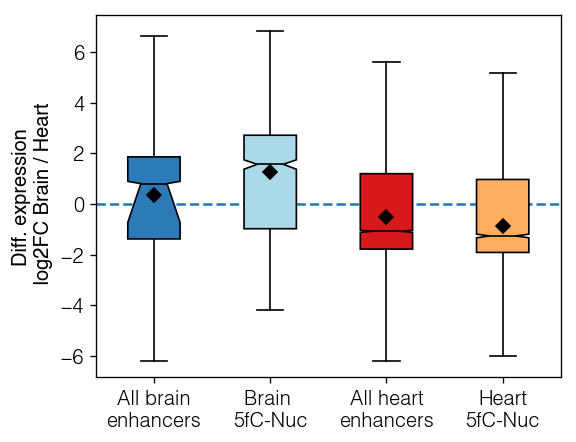

In [20]:
# Plot brain and heart
medianprops = dict(color='black')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='black')
f, ax = plt.subplots(1, 1, sharex=True,
                    figsize=(5,4), dpi=120)
_ = ax.axhline(linestyle="--")
_ = ax.boxplot([list(de_enhancer_brain), 
                    list(logfc_b_5fCNuc_de), 
                    list(de_enhancer_heart),
                    list(logfc_h_5fCNuc_de)], 
                    meanprops=meanpointprops,
                   showmeans=True, notch=True, 
                showfliers=False, medianprops=medianprops, patch_artist=True, 
                bootstrap=5000)
colors = ['#2c7bb6', '#abd9e9',"#d7191c", "#fdae61"]
for patch, color in zip(_['boxes'], colors):
    patch.set_facecolor(color)
names = ["All brain\nenhancers", "Brain \n5fC-Nuc", "All heart\nenhancers", "Heart\n5fC-Nuc"]
ax.set_ylabel("Diff. expression\n log2FC Brain / Heart")
ax.set_xticklabels(names)

plt.savefig("boxplot_DE_tissues_KO_5fc.pdf", bbox_inches = 'tight')

In [21]:
_, pval = stats.mannwhitneyu(list(de_enhancer_brain), list(logfc_b_5fCNuc_de) )
print("pval brain", pval)
_, pval = stats.mannwhitneyu( list(de_enhancer_heart),
                    list(logfc_h_5fCNuc_de))
print("pval heart", pval)

pval brain 4.88546101589e-14
pval heart 2.3276357888e-05


In [22]:
h_ko = set(find_genes_DE_inbed(enhancers_unique_heart, expr_ko))
b_ko = set(find_genes_DE_inbed(enhancers_unique_brain, expr_ko))

In [23]:
u_ko = h_ko.union(b_ko)
u_wt = h_wt.union(b_wt)
big_union = u_wt.union(u_ko)

In [24]:
col_big = np.zeros((len(big_union), 6))

for ii, ff in enumerate(big_union):
    if ff in h_wt:
        h1_wt = 1
    else:
        h1_wt = -1
        
    if ff in b_wt:
        b1_wt = 1
    else:
        b1_wt = -1
        
    col_big[ii, 0] = expr_all[str(ff).upper()]
    col_big[ii, 2] = b1_wt
    col_big[ii, 3] = h1_wt
    
    if ff in h_ko:
        h1_ko = 1
    else:
        h1_ko = -1
    if ff in b_ko:
        b1_ko = 1
    else:
        b1_ko = -1
        
    col_big[ii, 1] = expr_all_ko[str(ff).upper()]
    col_big[ii, 4] = b1_ko
    col_big[ii, 5] = h1_ko



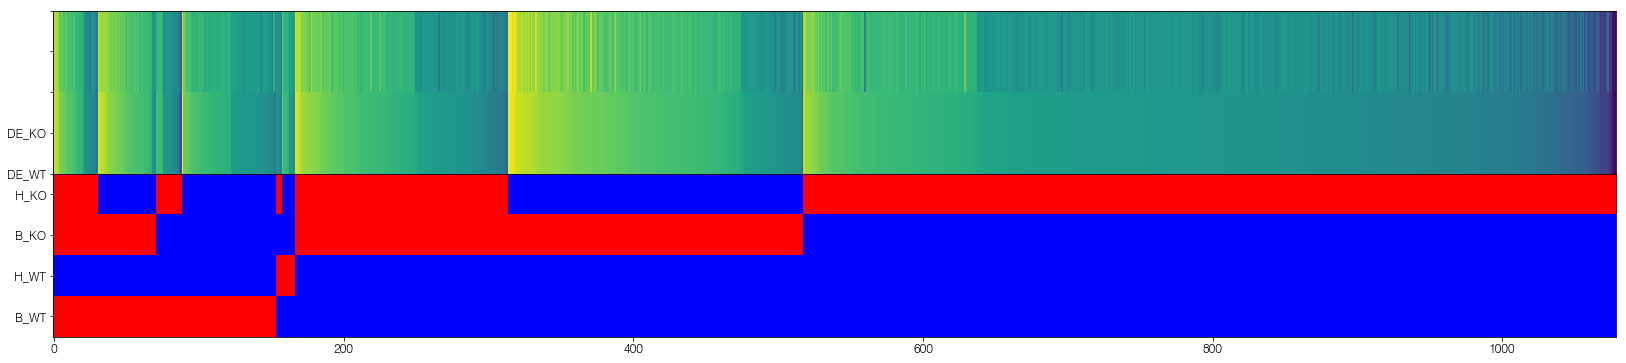

In [55]:
dd = np.array(sorted(col_big, reverse=True, key=lambda row: (row[2], row[3], row[4], row[5], row[0], row[1])))

fig, ax = plt.subplots(2,1, figsize=(28, 6), sharex=True)
#fig.canvas.draw()
_1 = ax[0].imshow((dd.T)[:2,:], 
                  cmap=plt.get_cmap("viridis"), 
                  origin='lower', 
                  interpolation='nearest', 
                  aspect="auto")
#labels = [item.get_text() for item in ax[0].get_yticklabels()]
#print(labels)
_2 = ax[1].imshow((dd.T)[2:, :], cmap=plt.get_cmap("bwr"), 
                  origin='lower', 
                  interpolation='nearest', 
                  aspect="auto")
labels = [item.get_text() for item in ax[1].get_yticklabels()]

names_y=["DE_WT","DE_KO"]
_ = ax[0].set_yticklabels(names_y)
#labels = [item.get_text() for item in ax[0].get_yticklabels()]

#labels = [item.get_text() for item in ax[1].get_yticklabels()]

labels=["","B_WT","H_WT","B_KO", "H_KO"]

ax[1].set_yticklabels(labels)
fig.subplots_adjust(hspace=0)
fig.savefig("test.pdf",bbox_inches = 'tight')

In [46]:
c= 0
for xxx in col_big:
    if xxx[5] == 1:
        c+=1
print(c)

761


In [27]:
_1

In [57]:
expr_all["VEGFA"]

-0.795654204967931

In [58]:
expr_all_ko["VEGFA"]

-0.548396229396626